Dataset head:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Dataset shape: (303, 14)

Data types:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Missing values:
age         0
sex         0
c

<Figure size 500x500 with 0 Axes>

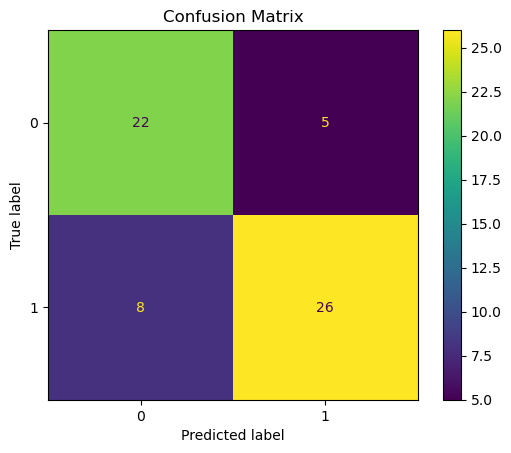

Accuracy: 78.69%
Precision: 83.87%
Recall: 76.47%
F1 Score: 80.00%
ROC AUC score: 0.790


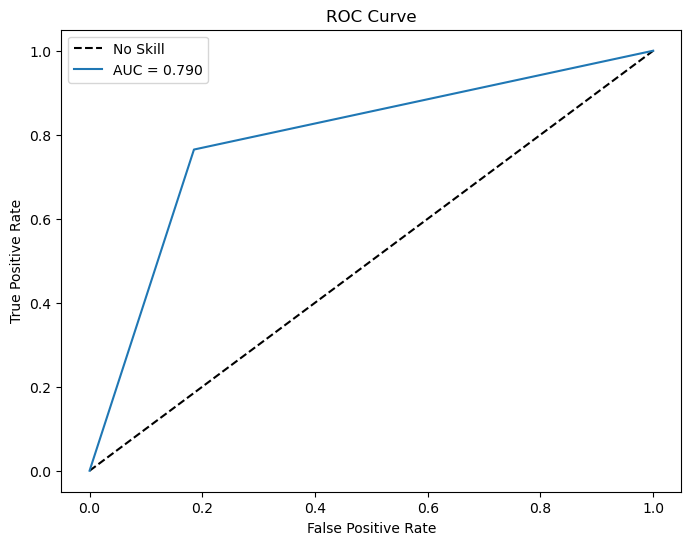


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
                            precision_score, recall_score, f1_score, classification_report,
                            precision_recall_curve, roc_curve, auc, roc_auc_score, 
                            balanced_accuracy_score)
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("heart.csv")
print("Dataset head:")
print(df.head())
print("\nDataset shape:", df.shape)

# Check data types and missing values
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Prepare features and target
X = df.drop(columns=['output'])
y = df['output']

print("\nFeatures:")
print(X.head())
print("Features shape:", X.shape)
print("\nTarget:")
print(y.head())
print("Target shape:", y.shape)

# Count class distribution
unique_values = np.unique(y)
counts = np.zeros_like(unique_values)
for i, value in enumerate(unique_values):
    counts[i] = np.count_nonzero(y == value)
    print(f"Class label: {value}, Count: {counts[i]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Check class distribution in test set
unique_values_test = np.unique(y_test)
counts_test = np.zeros_like(unique_values_test)
for i, value in enumerate(unique_values_test):
    counts_test[i] = np.count_nonzero(y_test == value)
    print(f"Test set - Class label: {value}, Count: {counts_test[i]}")

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nScaled training features (first 5 rows):")
print(X_train_scaled[:5])

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
preds = dt_model.predict(X_test_scaled)

# Evaluate the model
# Note: Using actual class labels from the dataset instead of ["sex", "cp"]
classes = [0, 1]  # Assuming binary classification with labels 0 and 1
cm = confusion_matrix(y_test, preds)
print('\nConfusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, preds)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')
print(f'ROC AUC score: {roc_auc:.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, preds))